# More matplotlib

In [25]:
import numpy as np
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
rcParams['figure.figsize'] = (12,6)
sb.set()

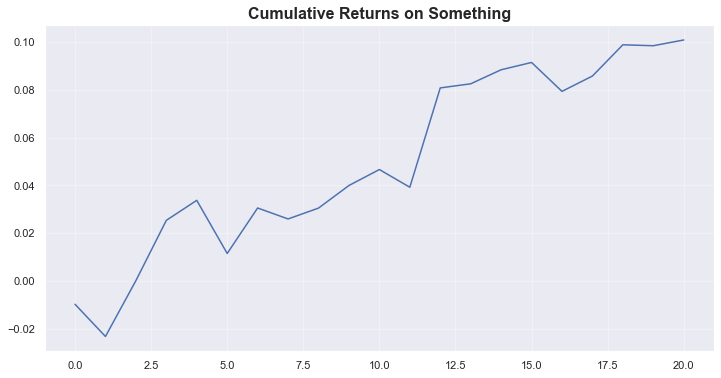

In [26]:
rets = np.random.normal(0, .02, size=21)
#plt.figure(figsize=(10,6))
plt.grid(True, alpha = .3)
plt.title("Cumulative Returns on Something", fontsize= 16, fontweight = 'bold')
plt.plot(rets.cumsum());

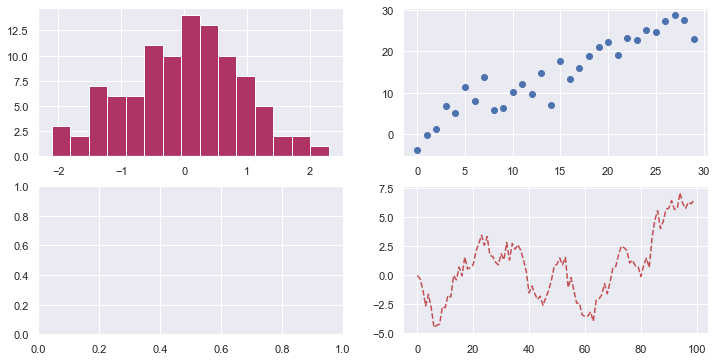

In [41]:
def special_graph(x):
    fig = plt.figure();
    ax1 = fig.add_subplot(2,2,1)
    ax2 = fig.add_subplot(2,2,2)
    ax3 = fig.add_subplot(2,2,3)
    ax4 = fig.add_subplot(2,2,4)
    plt.plot(np.random.randn(100).cumsum(), 'r--')
    ax1.hist(np.random.randn(100), bins = 15, color = '#af3465'); # (.5,.5,.5)
    ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30));

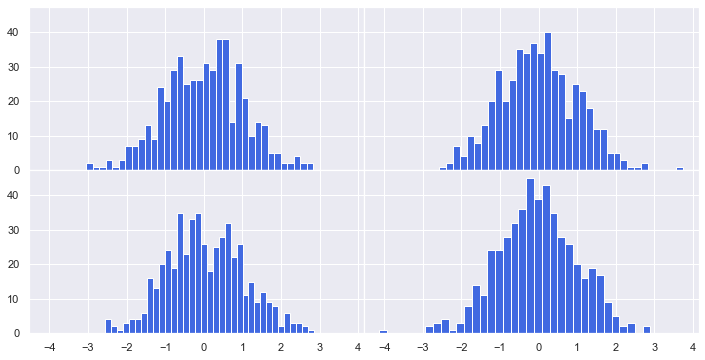

In [53]:
fig, axes = plt.subplots(2,2, sharex = True, sharey = True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500), bins = 35, color = 'royalblue')

plt.subplots_adjust(wspace = 0, hspace = 0)

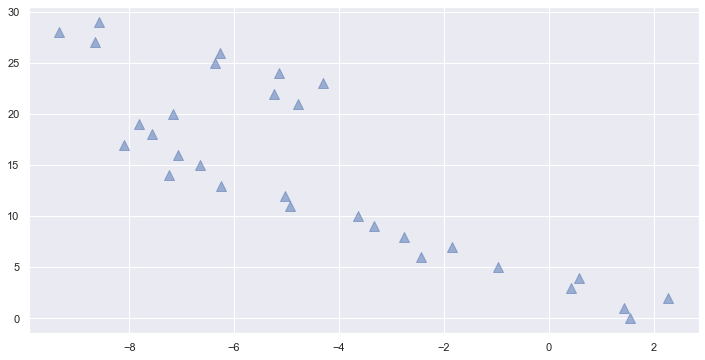

In [74]:
plt.scatter(np.random.randn(30).cumsum(), np.arange(30), marker = '^', s = 100,  alpha= .5)

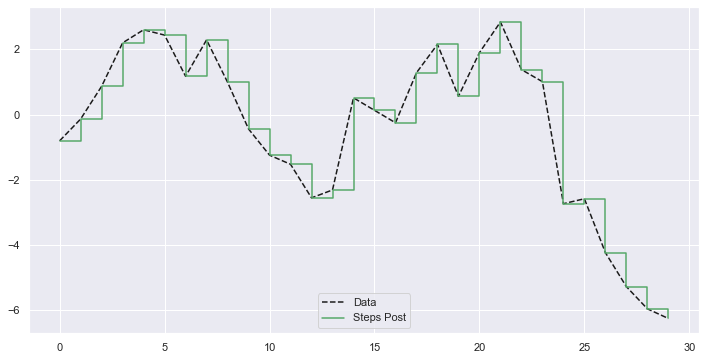

In [78]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label = 'Data')
plt.plot(data, 'g', drawstyle = 'steps-post', label = 'Steps Post')
plt.legend(loc=8);

In [86]:
data = sb.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


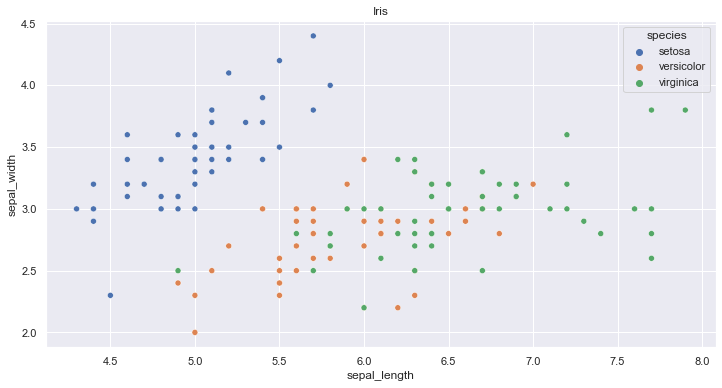

In [97]:
sb.scatterplot(x=data.sepal_length, y=data.sepal_width, hue=data.species)
plt.title("Iris");

In [100]:
tips = sb.load_dataset('tips')
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [103]:
party_size = pd.crosstab(tips['day'], tips['size'])
party_size

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [104]:
percents = party_size.div(party_size.sum(1), axis = 0)
percents

size,1,2,3,4,5,6
day,,,,,,
Thur,0.016129,0.774194,0.064516,0.080645,0.016129,0.048387
Fri,0.052632,0.842105,0.052632,0.052632,0.000000,0.000000
Sat,0.022989,0.609195,0.206897,0.149425,0.011494,0.000000
Sun,0.000000,0.513158,0.197368,0.236842,0.039474,0.013158


<AxesSubplot:xlabel='day'>

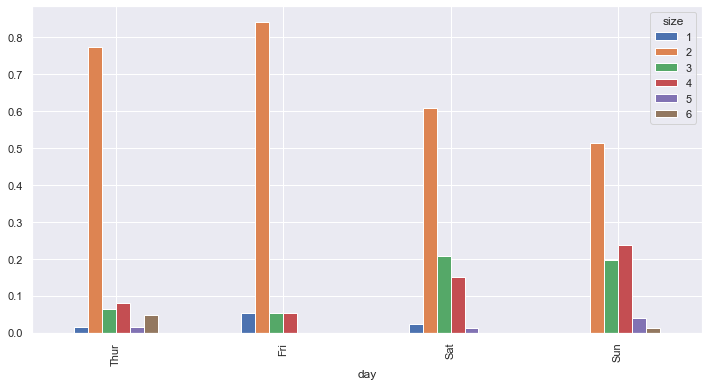

In [105]:
percents.plot(kind= 'bar')

In [107]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

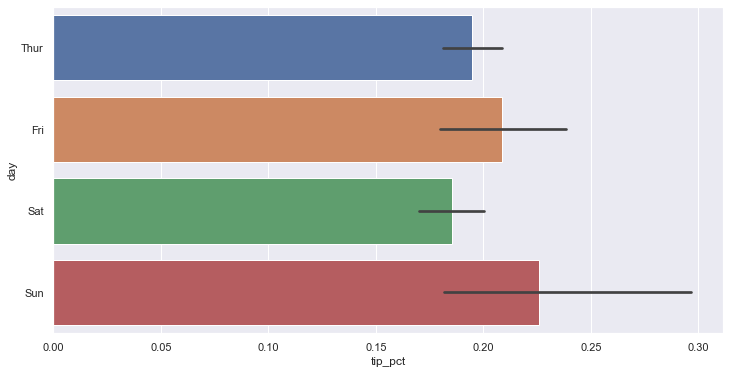

In [108]:
sb.barplot(x= 'tip_pct', y = 'day', data = tips)

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

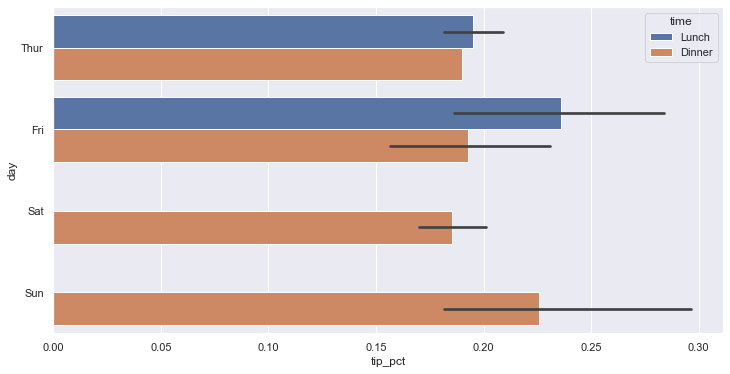

In [109]:
sb.barplot(x= 'tip_pct', y = 'day', hue = 'time',  data = tips)

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

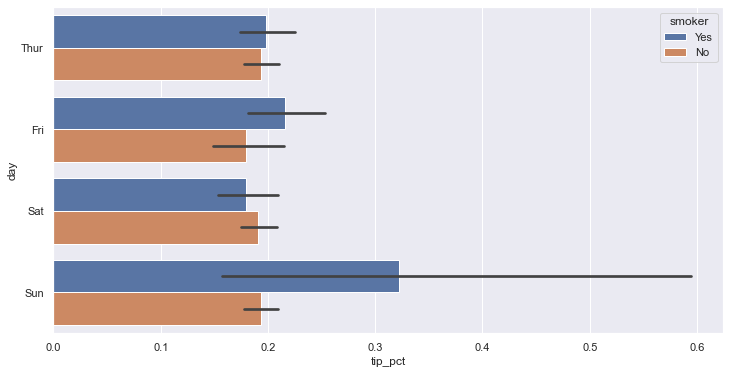

In [110]:
sb.barplot(x= 'tip_pct', y = 'day', hue = 'smoker',  data = tips)

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

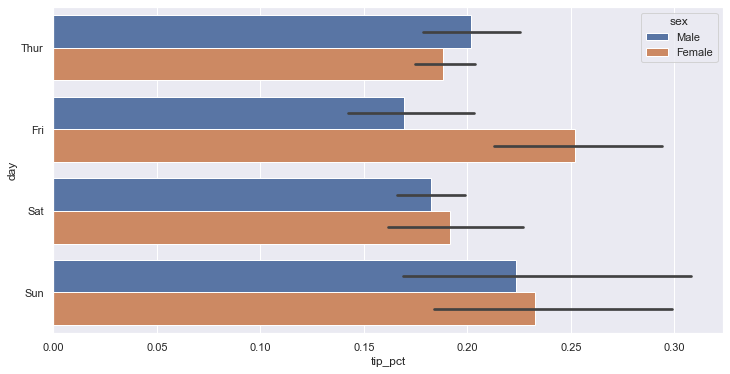

In [111]:
sb.barplot(x= 'tip_pct', y = 'day', hue = 'sex',  data = tips)

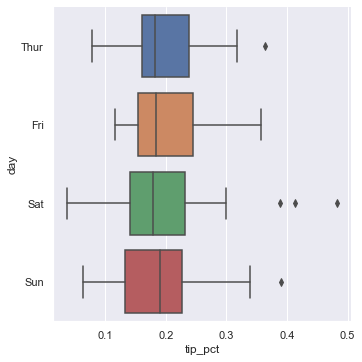

In [113]:
sb.catplot(x='tip_pct', y = 'day', kind = 'box', data = tips[tips['tip_pct'] < .5])